In [1]:
# Import python packages
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# open the dataset by rasterio
# You can write the name of the tif file if it is in the same folder/ directory of the python file, otherwise you should include the full path to the file
ds=rio.open("DEM.tif")

In [ ]:
# data set description

In [3]:
# Name
ds.name

'DEM.tif'

In [4]:
# Mode
ds.mode

'r'

In [5]:
# Number of bands in the dataset
ds.count

1

In [6]:
# dataset width
ds.width 

8282

In [7]:
# dataset height
ds.height

6065

In [8]:
# Cell size and location of upper left corner 
ds.transform

Affine(1.0, 0.0, 381191.5,
       0.0, -1.0, 5818385.5)

In [9]:
# Projection
ds.crs

CRS.from_epsg(25833)

In [10]:
# Read the data set as array
arr=ds.read(1)

In [11]:
# The nodata value in the raster dataset is -3.402823e+38, it will affect when we plot the raster so it is better to replace it with np.nan
arr

array([[-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38],
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38],
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38],
       ...,
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38],
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38],
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38]], dtype=float32)

In [13]:
# Replace the -3.402823e+38 with np.nan
arr=np.where(arr<-10,np.nan,arr)

In [14]:
arr

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

<function matplotlib.pyplot.show(close=None, block=None)>

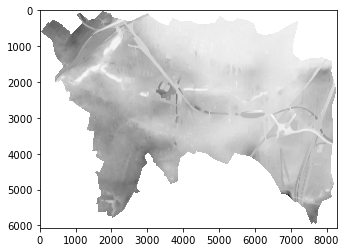

In [16]:
# plotting 
plt.imshow(arr, cmap="Greys")
plt.show

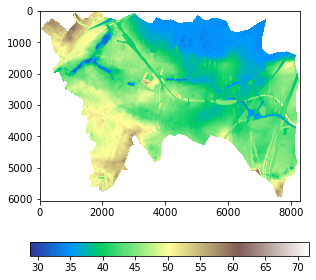

In [18]:
# In order to plot a colorbar we need to create a hidden image to use it to create the colorbar

fig , ax=plt.subplots(figsize=(5,5))
# hidden 
image_hidden=ax.imshow(arr,cmap="terrain")
# image
image=plt.imshow(arr,cmap="terrain")

# add colorbar
fig.colorbar(image_hidden, ax=ax, orientation='horizontal')